### JHU_COVID-19 DashBoard

https://www.arcgis.com/apps/dashboards/bda7594740fd40299423467b48e9ecf6

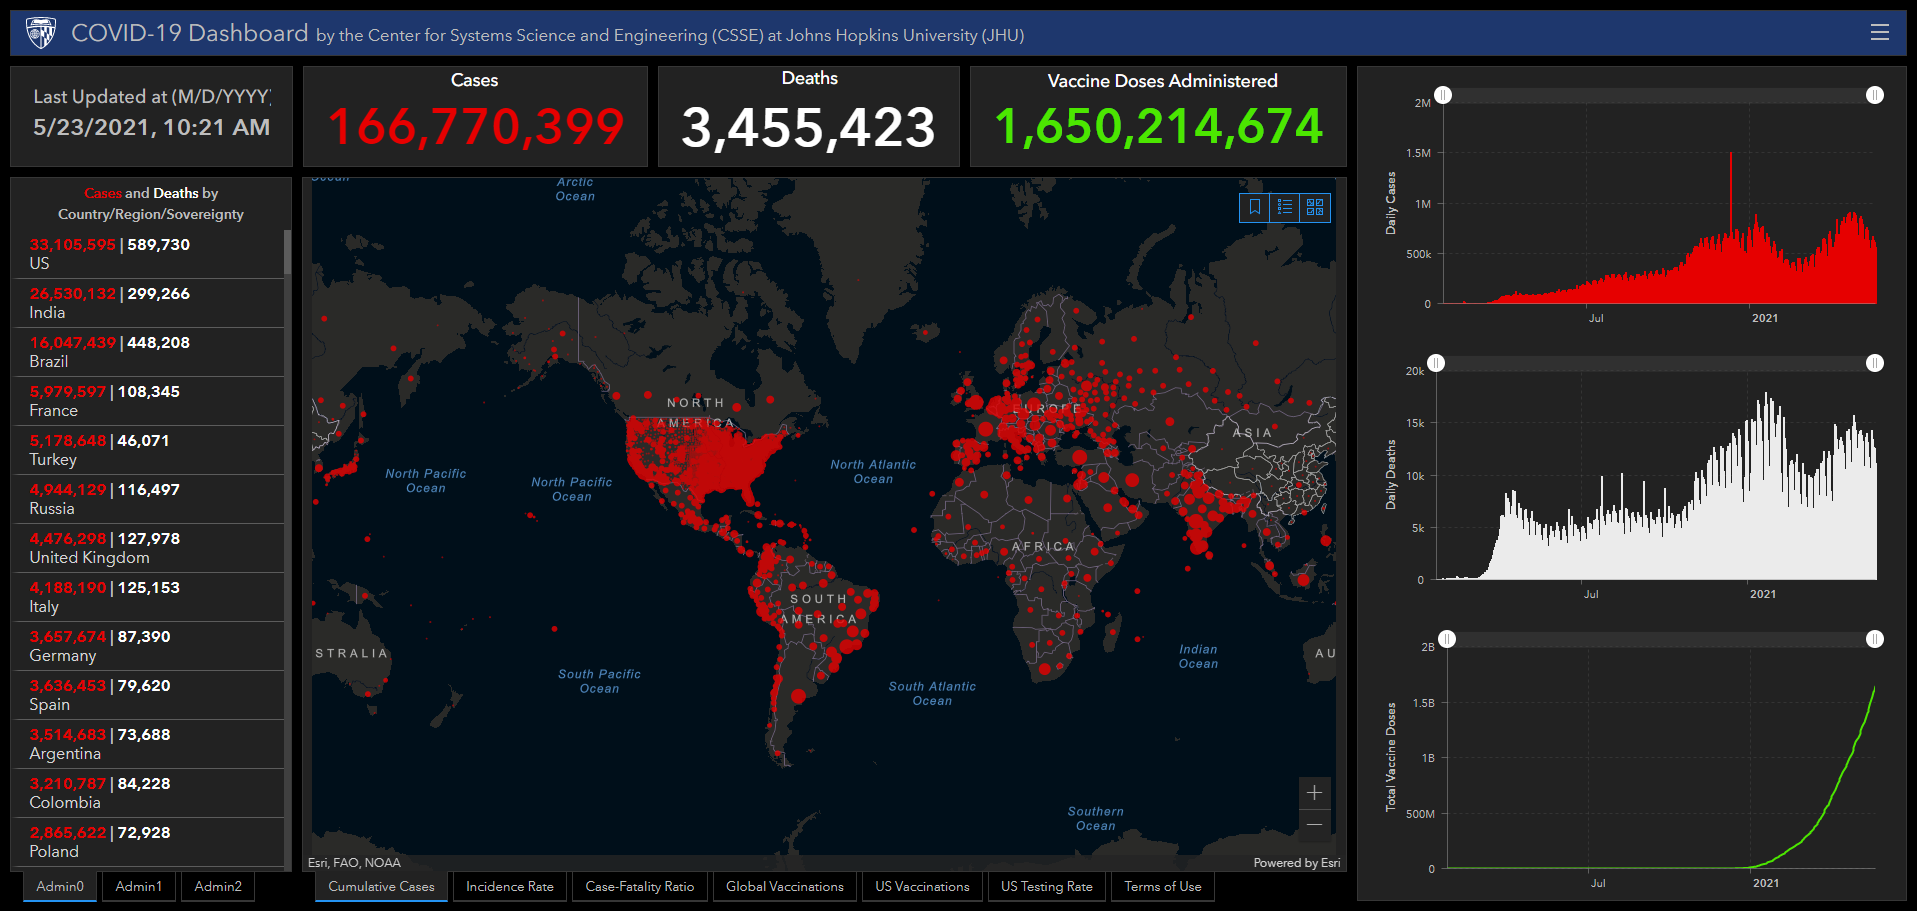

### JHU_COVID-19_Dataset on Githup
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

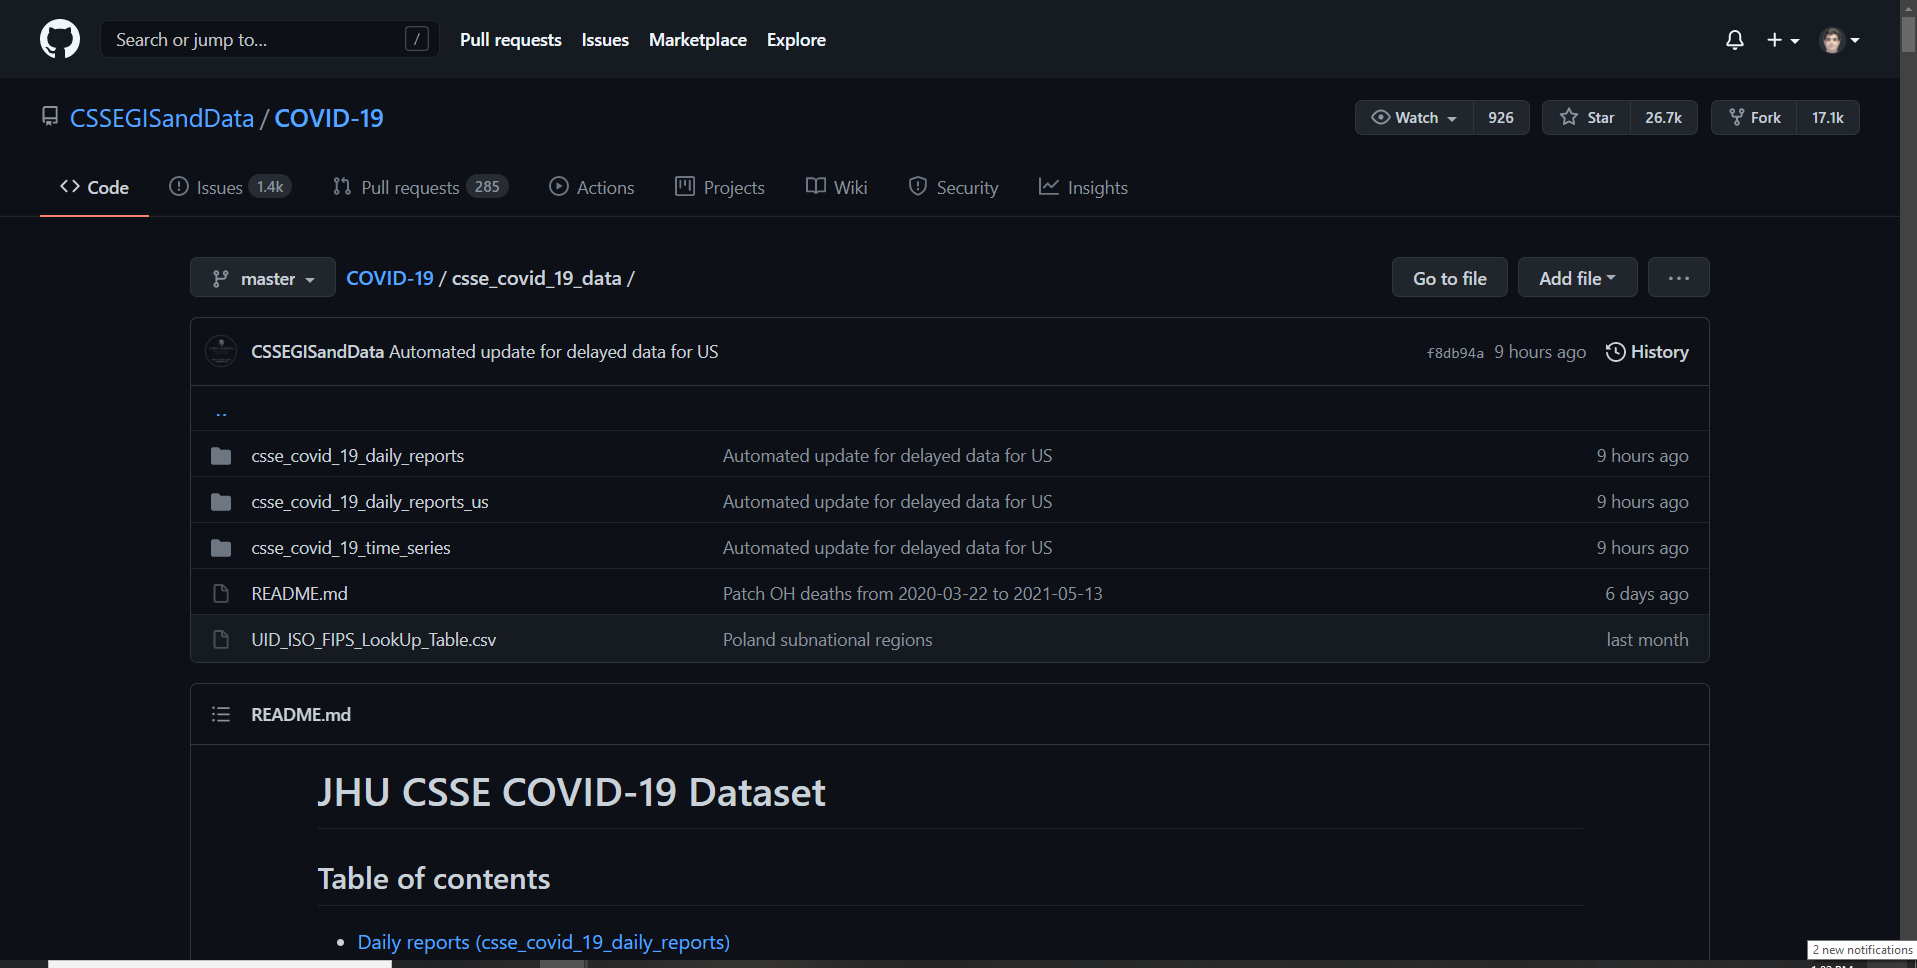

In [17]:
try:
    from faker import Faker
except:
   !pip install faker 
   from faker import Faker
    
try:
    import psycopg2 
except:
    !pip install psycopg2-binary 
    import psycopg2
    
try:
    from sqlalchemy import create_engine
except:
    !pip install sqlalchemy
    from sqlalchemy import create_engine
    
    
try:
    import pandas as pd 
except:
    !pip install pandas
    import pandas as pd 
     
try:
    import matplotlib 
except:
    !pip install matplotlib
    import matplotlib

try:
    import sklearn 
except:
    !pip install sklearn
    import sklearn
    

### Extract up-to-date data using Pandas 

#### LookupTable

In [18]:
import pandas as pd 
URL='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
UID_ISO_FIPS_LookUp_Table=pd.read_csv(URL)
UID_ISO_FIPS_LookUp_Table.head(10)

UID iso2 iso3  code3  FIPS Admin2 Province_State       Country_Region  \
0    4   AF  AFG    4.0   NaN    NaN            NaN          Afghanistan   
1    8   AL  ALB    8.0   NaN    NaN            NaN              Albania   
2   12   DZ  DZA   12.0   NaN    NaN            NaN              Algeria   
3   20   AD  AND   20.0   NaN    NaN            NaN              Andorra   
4   24   AO  AGO   24.0   NaN    NaN            NaN               Angola   
5   28   AG  ATG   28.0   NaN    NaN            NaN  Antigua and Barbuda   
6   32   AR  ARG   32.0   NaN    NaN            NaN            Argentina   
7   51   AM  ARM   51.0   NaN    NaN            NaN              Armenia   
8   40   AT  AUT   40.0   NaN    NaN            NaN              Austria   
9   31   AZ  AZE   31.0   NaN    NaN            NaN           Azerbaijan   

        Lat      Long_         Combined_Key  Population  
0  33.93911  67.709953          Afghanistan  38928341.0  
1  41.15330  20.168300              Albania   2877800.0  
2  28.03390   1.659600              Algeria  43851043.0  
3  42.50630   1.521800              Andorra     77265.0  
4 -11.20270  17.873900               Angola  32866268.0  
5  17.06080 -61.796400  Antigua and Barbuda     97928.0  
6 -38.41610 -63.616700            Argentina  45195777.0  
7  40.06910  45.038200              Armenia   2963234.0  
8  47.51620  14.550100              Austria   9006400.0  
9  40.14310  47.576900           Azerbaijan  10139175.0

#### Daily Cases Global

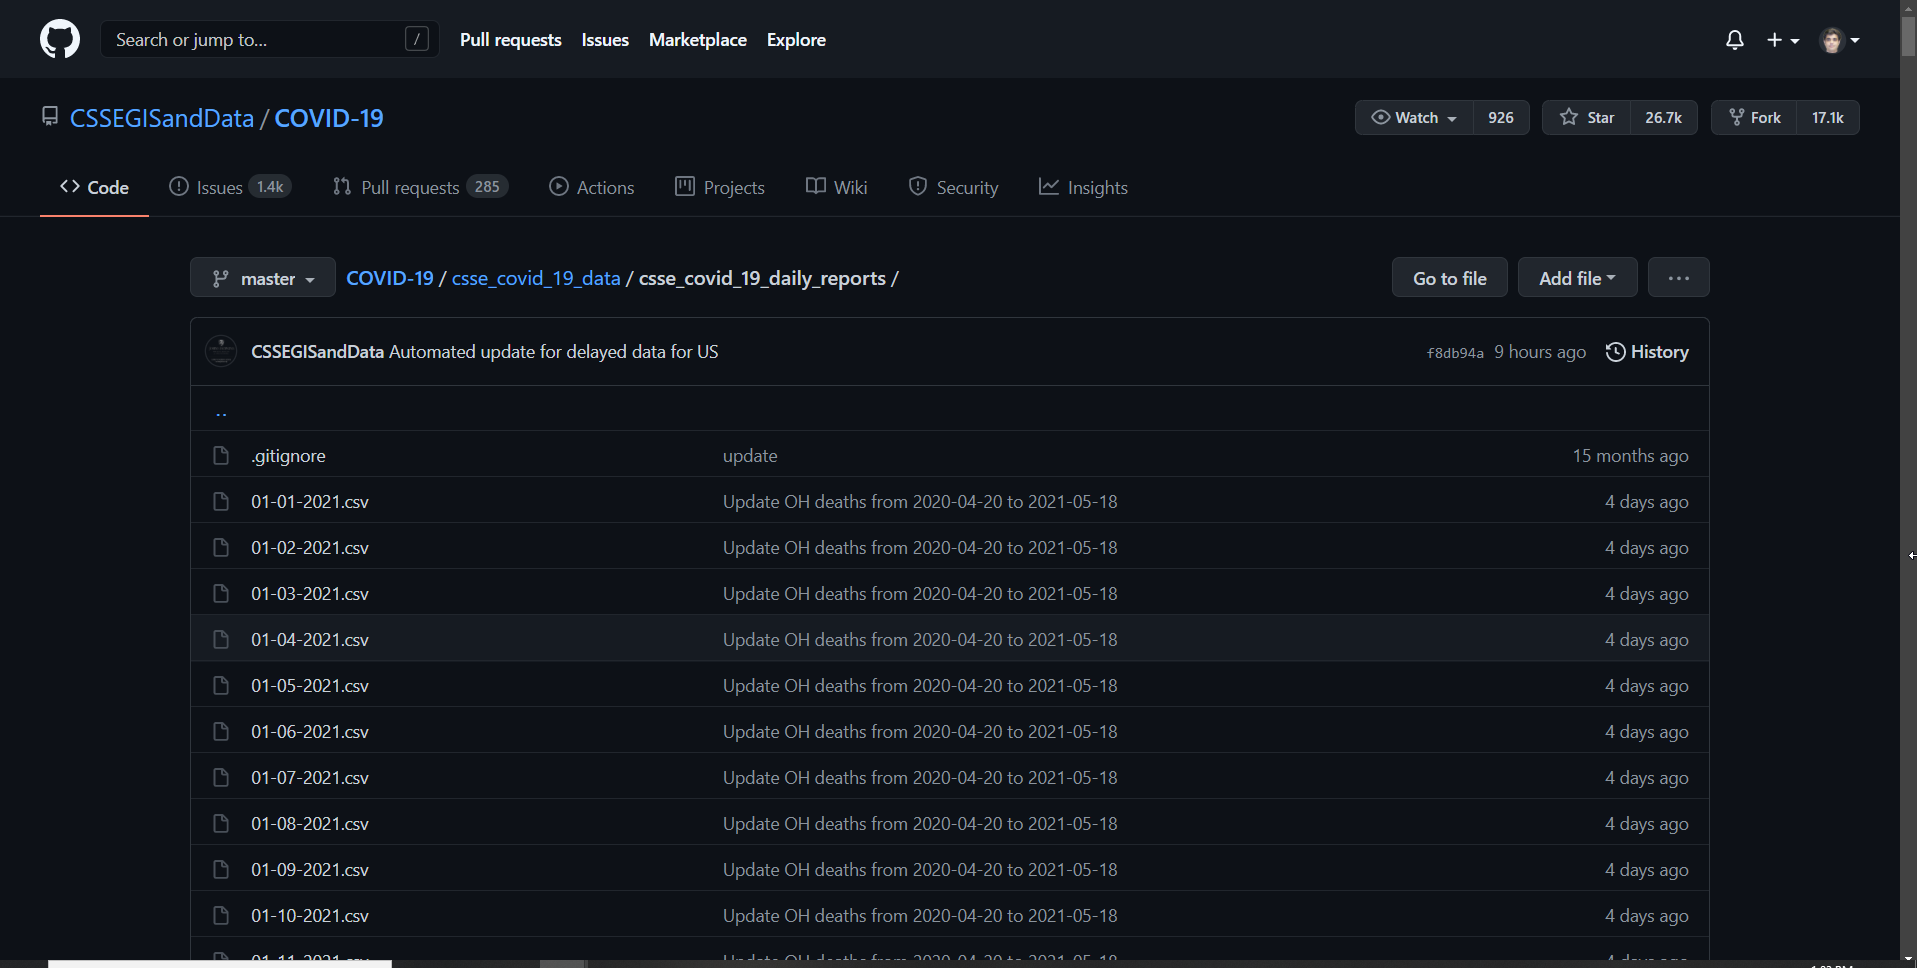

In [19]:
import pandas as pd 
Day='01-01-2021'
URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{Day}.csv'
DF_day=pd.read_csv(URL_Day)
DF_day.head(10)

FIPS Admin2                Province_State       Country_Region  \
0   NaN    NaN                           NaN          Afghanistan   
1   NaN    NaN                           NaN              Albania   
2   NaN    NaN                           NaN              Algeria   
3   NaN    NaN                           NaN              Andorra   
4   NaN    NaN                           NaN               Angola   
5   NaN    NaN                           NaN  Antigua and Barbuda   
6   NaN    NaN                           NaN            Argentina   
7   NaN    NaN                           NaN              Armenia   
8   NaN    NaN  Australian Capital Territory            Australia   
9   NaN    NaN               New South Wales            Australia   

           Last_Update       Lat       Long_  Confirmed  Deaths  Recovered  \
0  2021-01-02 05:22:33  33.93911   67.709953      51526    2191      41727   
1  2021-01-02 05:22:33  41.15330   20.168300      58316    1181      33634   
2  2021-01-02 05:22:33  28.03390    1.659600      99897    2762      67395   
3  2021-01-02 05:22:33  42.50630    1.521800       8117      84       7463   
4  2021-01-02 05:22:33 -11.20270   17.873900      17568     405      11146   
5  2021-01-02 05:22:33  17.06080  -61.796400        159       5        148   
6  2021-01-02 05:22:33 -38.41610  -63.616700    1629594   43319    1426676   
7  2021-01-02 05:22:33  40.06910   45.038200     159738    2828     143355   
8  2021-01-02 05:22:33 -35.47350  149.012400        118       3        114   
9  2021-01-02 05:22:33 -33.86880  151.209300       4947      54          0   

     Active                             Combined_Key  Incident_Rate  \
0       0.0                              Afghanistan       0.000000   
1   23501.0                                  Albania    2026.409062   
2   29740.0                                  Algeria     227.809861   
3     570.0                                  Andorra   10505.403482   
4    6017.0                                   Angola      53.452981   
5       6.0                      Antigua and Barbuda     162.364186   
6  159599.0                                Argentina    3605.633332   
7   13555.0                                  Armenia    5390.664389   
8       1.0  Australian Capital Territory, Australia      27.563653   
9    1696.0               New South Wales, Australia      60.938655   

   Case_Fatality_Ratio  
0             4.252222  
1             2.025173  
2             2.764848  
3             1.034865  
4             2.305328  
5             3.144654  
6             2.658269  
7             1.770399  
8             2.542373  
9             1.091571

  
  
  - **Admin2**: County name. US only.


---


  - **Province_State**: Province, state or dependency name.

---


  - **Country_Region**: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.


---


  - **Last Update**: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).


---


  - **Lat and Long_**: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
---
  - **Confirmed**: Counts include confirmed and probable (where reported).
---
  - **Deaths**: Counts include confirmed and probable (where reported).
---
  - **Recovered**: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
---
  - **Active**: Active cases = total cases - total recovered - total deaths.
---
  - **Incident_Rate**: Incidence Rate = cases per 100,000 persons.
---
  - **Case_Fatality_Ratio (%)**: Case-Fatality Ratio (%) = Number recorded deaths / Number cases.
---
  - **All cases**, deaths, and recoveries reported are based on the date of initial report. Exceptions to this are noted in the "Data Modification" and "Retrospective reporting of (probable) cases and deaths" subsections below.

#### Daily Cases USA

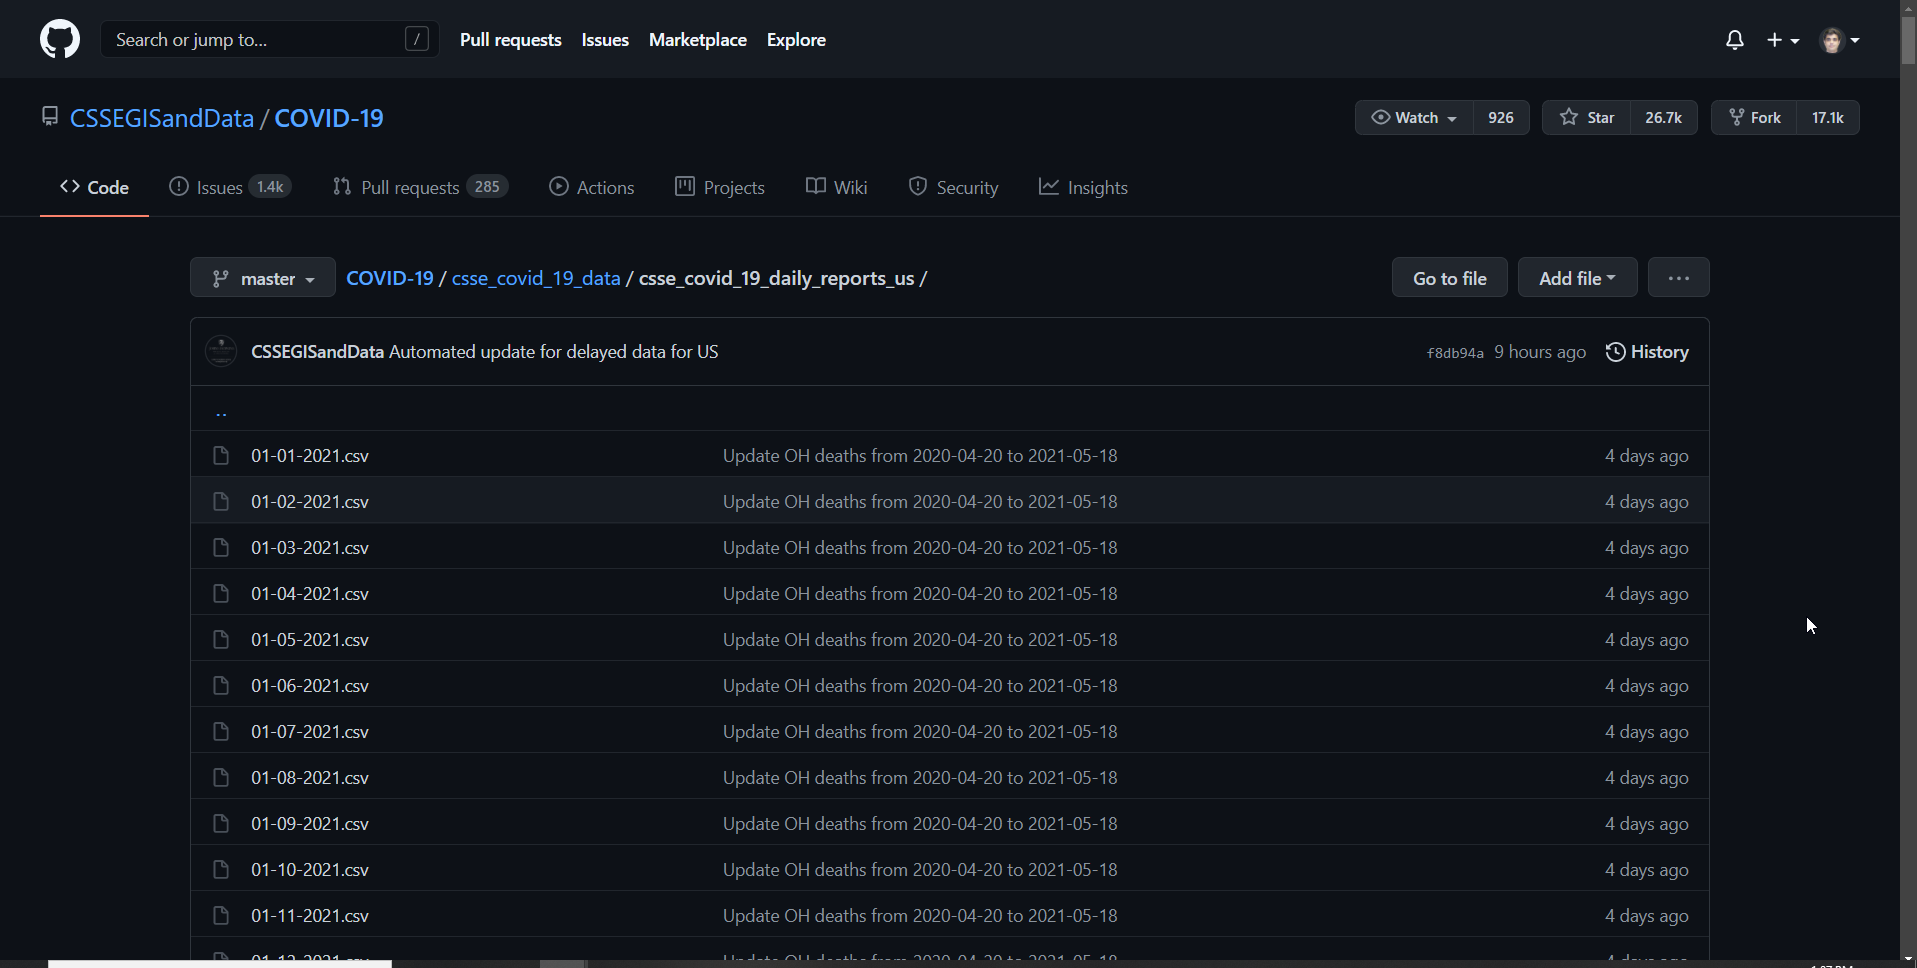

In [20]:
import pandas as pd 
Day='05-22-2021'
URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{Day}.csv'
DF_day=pd.read_csv(URL_Day)
DF_day.head(3)

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2021-05-23 04:31:33  32.3182  -86.9023   
1          Alaska             US  2021-05-23 04:31:33  61.3707 -152.4044   
2  American Samoa             US  2021-05-23 04:31:33 -14.2710 -170.1320   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  \
0     541928   11112        NaN     NaN   1.0   11052.570931   
1      69902     369        NaN     NaN   2.0    9555.393038   
2          0       0        NaN     NaN  60.0       0.000000   

   Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio         UID  \
0           2590345.0                  NaN             2.050457  84000001.0   
1           2224847.0                  NaN             0.527882  84000002.0   
2              2140.0                  NaN                  NaN        16.0   

  ISO3   Testing_Rate  Hospitalization_Rate  
0  USA   52829.844275                   NaN  
1  USA  304129.889480                   NaN  
2  ASM    3846.084722                   NaN

#### Timeseries data

  - Confirmed: Global, USA 
  - Deaths: Global, USA
  - Recovered: Global   

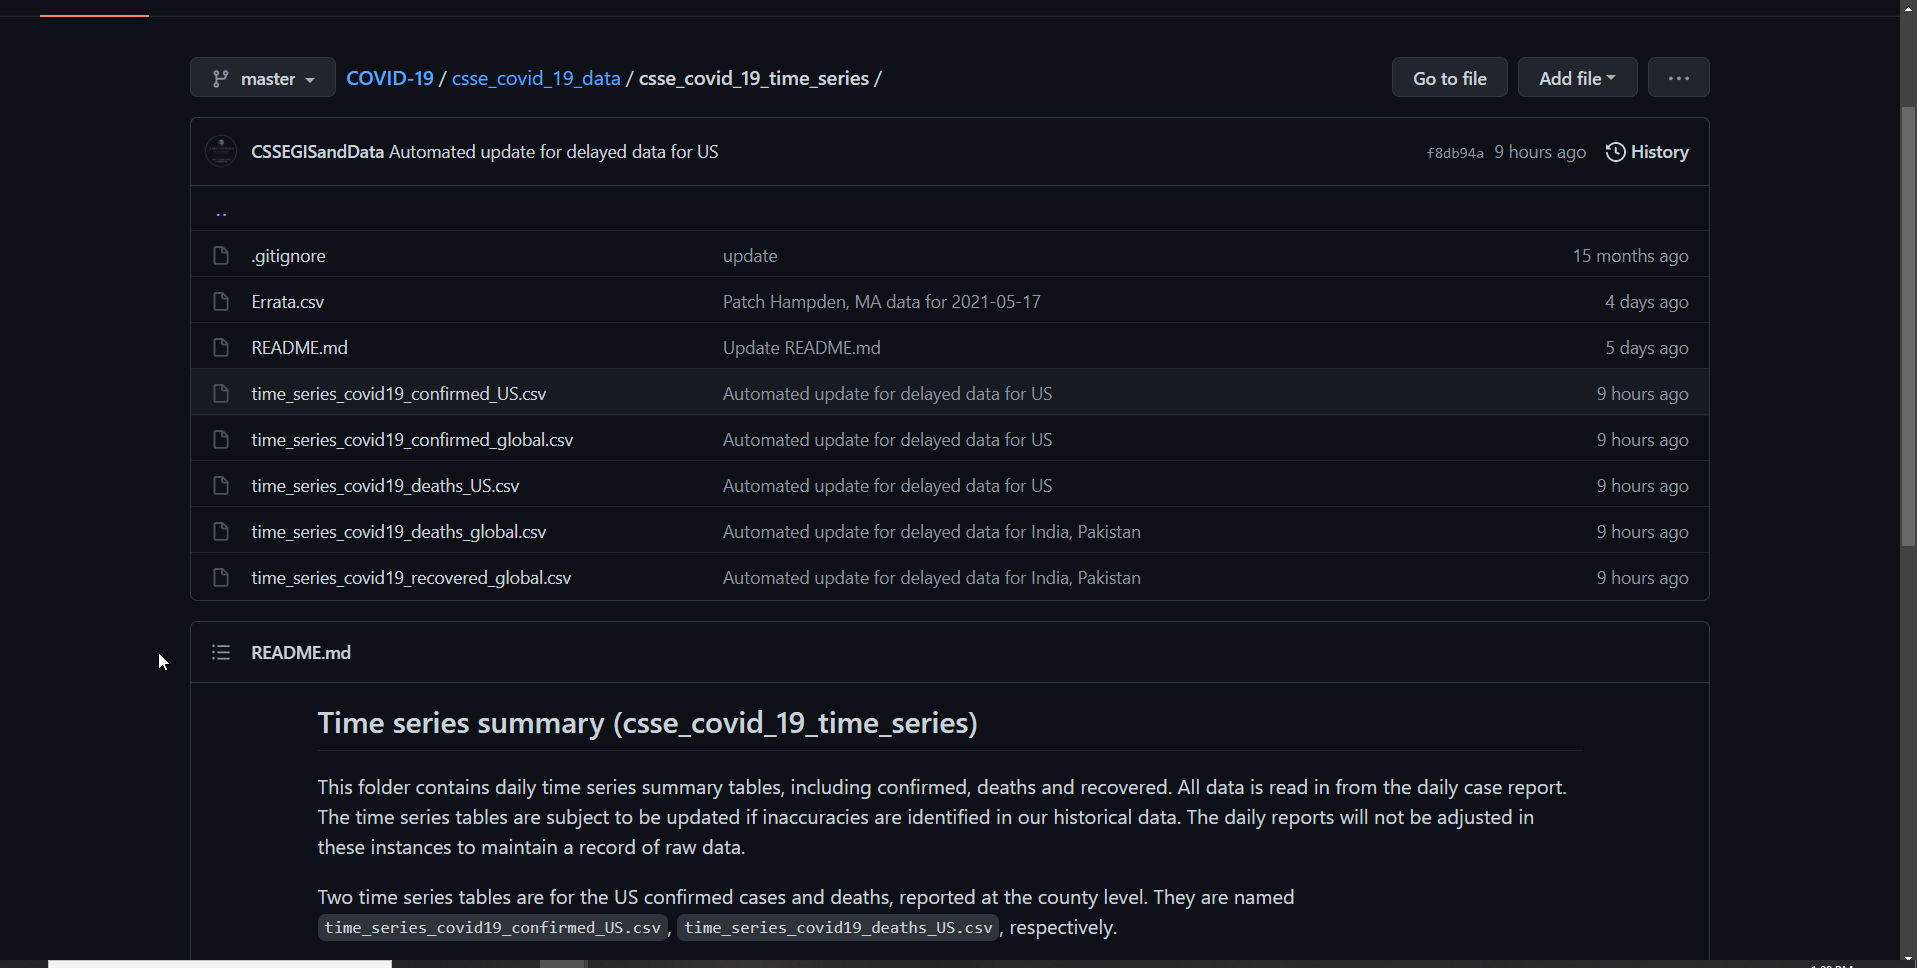

In [21]:
File1='time_series_covid19_confirmed_global'
File2='time_series_covid19_confirmed_US'
File3='time_series_covid19_deaths_global'
File4='time_series_covid19_deaths_US'
File5='time_series_covid19_recovered_global'
URL_TimeSeries=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{File1}.csv'
DF_TimeSeries=pd.read_csv(URL_TimeSeries)
DF_TimeSeries.head(10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/14/21  \
0        0        0        0        0        0        0  ...    63355   
1        0        0        0        0        0        0  ...   131939   
2        0        0        0        0        0        0  ...   125059   
3        0        0        0        0        0        0  ...    13510   
4        0        0        0        0        0        0  ...    30030   
5        0        0        0        0        0        0  ...     1240   
6        0        0        0        0        0        0  ...  3269466   
7        0        0        0        0        0        0  ...   220447   
8        0        0        0        0        0        0  ...      124   
9        0        0        0        0        3        4  ...     5555   

   5/15/21  5/16/21  5/17/21  5/18/21  5/19/21  5/20/21  5/21/21  5/22/21  \
0    63412    63484    63598    63819    64122    64575    65080    65486   
1   131978   132015   132032   132071   132095   132118   132153   132176   
2   125194   125311   125485   125693   125896   126156   126434   126651   
3    13510    13510    13555    13569    13569    13569    13569    13569   
4    30354    30637    30787    31045    31438    31661    31909    32149   
5     1241     1241     1251     1251     1252     1255     1255     1257   
6  3290935  3307285  3335965  3371508  3411160  3447044  3482512  3514683   
7   220729   220860   220927   221139   221368   221559   221699   221880   
8      124      124      124      124      124      124      124      124   
9     5558     5560     5563     5565     5567     5567     5568     5570   

   5/23/21  
0    65728  
1   132209  
2   126860  
3    13569  
4    32441  
5     1257  
6  3539484  
7   221948  
8      124  
9     5572  

[10 rows x 492 columns]

#### Case study 

    1) Get all daily data for India/Delhi directly from github repo up to now
    2) Get time series data for India/Delhi from github repo up to now
    3) 

In [22]:
# Get all daily data for India directly from github repo up to now
import pandas as pd 
Day='01-01-2021'
URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{Day}.csv'
DF_day=pd.read_csv(URL_Day)
DF_day['Day']=Day
cond=(DF_day.Country_Region=='India')&(DF_day.Province_State=='Delhi')
Selec_columns=['Day','Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio']
DF_i=DF_day[cond][Selec_columns].reset_index(drop=True)
DF_i

Day Country_Region          Last_Update        Lat     Long_  \
0  01-01-2021          India  2021-01-02 05:22:33  28.646519  77.10898   

   Confirmed  Deaths  Recovered  Active  Combined_Key  Incident_Rate  \
0     625369   10536     609322  5511.0  Delhi, India    3342.267153   

   Case_Fatality_Ratio  
0             1.684765

In [23]:
List_of_days=[]
for year in range(2020,2022):
  for month in range(1,13):
    for day in range(1,32):
      month=int(month)
      if day <=9:
        day=f'0{day}'

      if month <= 9 :
        month=f'0{month}'
      List_of_days.append(f'{month}-{day}-{year}')

In [24]:
# Check this list 
List_of_days[0:10]

['01-01-2020',
 '01-02-2020',
 '01-03-2020',
 '01-04-2020',
 '01-05-2020',
 '01-06-2020',
 '01-07-2020',
 '01-08-2020',
 '01-09-2020',
 '01-10-2020']

In [14]:
Day='01-01-2021'

def Get_DF_i(Day):
    DF_i=None
    try: 
        URL_Day=f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{Day}.csv'
        DF_day=pd.read_csv(URL_Day)
        DF_day['Day']=Day
        cond=(DF_day.Country_Region=='India')&(DF_day.Province_State=='Delhi')
        Selec_columns=['Day','Country_Region', 'Last_Update',
              'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
              'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio']
        DF_i=DF_day[cond][Selec_columns].reset_index(drop=True)
    except:
    #print(f'{Day} is not available!')
        pass
    return DF_i

print(Get_DF_i(Day))

Day='02-31-2021'

print(Get_DF_i(Day))

          Day Country_Region          Last_Update        Lat     Long_  \
0  01-01-2021          India  2021-01-02 05:22:33  28.646519  77.10898   

   Confirmed  Deaths  Recovered  Active  Combined_Key  Incident_Rate  \
0     625369   10536     609322  5511.0  Delhi, India    3342.267153   

   Case_Fatality_Ratio  
0             1.684765  
None


In [25]:
import time 

Start=time.time()
DF_all=[]
for Day in List_of_days:
    DF_all.append(Get_DF_i(Day))
End=time.time()
Time_in_sec=round((End-Start)/60,2)
print(f'It took {Time_in_sec} minutes to get all data')


It took 4.25 minutes to get all data


In [32]:
DF_India=pd.concat(DF_all).reset_index(drop=True)
# Create DateTime for Last_Update
DF_India['Last_Updat']=pd.to_datetime(DF_India.Last_Update, infer_datetime_format=True)  
DF_India['Day']=pd.to_datetime(DF_India.Day, infer_datetime_format=True)  

DF_India['Case_Fatality_Ratio']=DF_India['Case_Fatality_Ratio'].astype(float)

DF_India.head(10)

Day Country_Region          Last_Update        Lat     Long_  \
0 2020-11-09          India  2020-11-10 05:40:07  28.646519  77.10898   
1 2020-11-10          India  2020-11-11 05:25:30  28.646519  77.10898   
2 2020-11-11          India  2020-11-12 05:25:55  28.646519  77.10898   
3 2020-11-12          India  2020-11-13 05:25:30  28.646519  77.10898   
4 2020-11-13          India  2020-11-14 05:25:37  28.646519  77.10898   
5 2020-11-14          India  2020-11-15 05:26:53  28.646519  77.10898   
6 2020-11-15          India  2020-11-16 05:25:57  28.646519  77.10898   
7 2020-11-16          India  2020-11-17 05:25:54  28.646519  77.10898   
8 2020-11-17          India  2020-11-18 05:40:31  28.646519  77.10898   
9 2020-11-18          India  2020-11-19 05:25:23  28.646519  77.10898   

   Confirmed  Deaths  Recovered   Active  Combined_Key  Incident_Rate  \
0     443552    7060   396697.0  39795.0  Delhi, India    2370.551275   
1     451382    7143   402854.0  41385.0  Delhi, India    2412.398491   
2     459975    7228   410118.0  42629.0  Delhi, India    2458.323540   
3     467028    7332   416580.0  43116.0  Delhi, India    2496.018101   
4     474830    7423   423078.0  44329.0  Delhi, India    2496.018101   
5     482170    7519   430195.0  44456.0  Delhi, India    2576.944097   
6     485405    7614   437801.0  39990.0  Delhi, India    2594.233464   
7     489202    7713   441361.0  40128.0  Delhi, India    2614.526425   
8     495598    7812   445782.0  42004.0  Delhi, India    2648.709668   
9     503084    7943   452683.0  42458.0  Delhi, India    2688.718386   

   Case_Fatality_Ratio          Last_Updat  
0             1.591696 2020-11-10 05:40:07  
1             1.582473 2020-11-11 05:25:30  
2             1.571390 2020-11-12 05:25:55  
3             1.569927 2020-11-13 05:25:30  
4             1.569927 2020-11-14 05:25:37  
5             1.559409 2020-11-15 05:26:53  
6             1.568587 2020-11-16 05:25:57  
7             1.576649 2020-11-17 05:25:54  
8             1.576278 2020-11-18 05:40:31  
9             1.578862 2020-11-19 05:25:23

In [33]:
DF_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Day                  196 non-null    datetime64[ns]
 1   Country_Region       196 non-null    object        
 2   Last_Update          196 non-null    object        
 3   Lat                  196 non-null    float64       
 4   Long_                196 non-null    float64       
 5   Confirmed            196 non-null    int64         
 6   Deaths               196 non-null    int64         
 7   Recovered            196 non-null    float64       
 8   Active               196 non-null    float64       
 9   Combined_Key         196 non-null    object        
 10  Incident_Rate        196 non-null    float64       
 11  Case_Fatality_Ratio  196 non-null    float64       
 12  Last_Updat           196 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(6), i

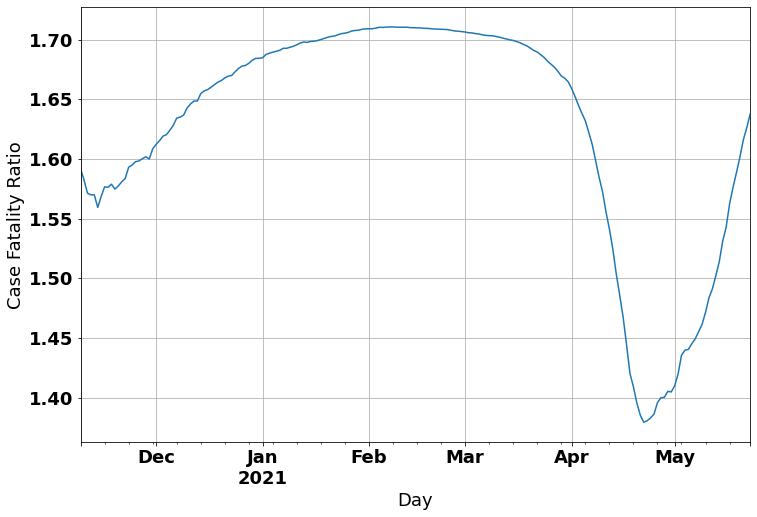

In [34]:
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,8))
DF_India_u=DF_India.copy()
DF_India_u.index=DF_India_u.Day
DF_India_u['Case_Fatality_Ratio'].plot()
plt.ylabel('Case Fatality Ratio')
plt.grid()

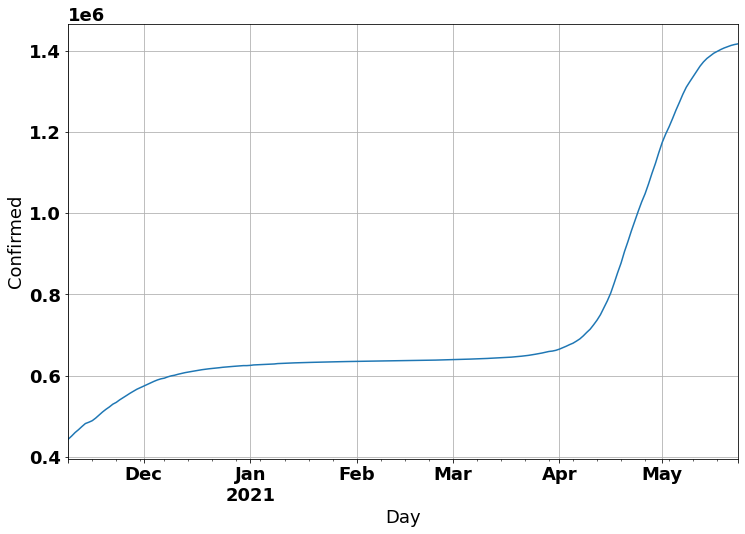

In [35]:
plt.figure(figsize=(12,8))
DF_India_u=DF_India.copy()
DF_India_u.index=DF_India_u.Day
DF_India_u['Confirmed'].plot()
plt.ylabel('Confirmed')
plt.grid()

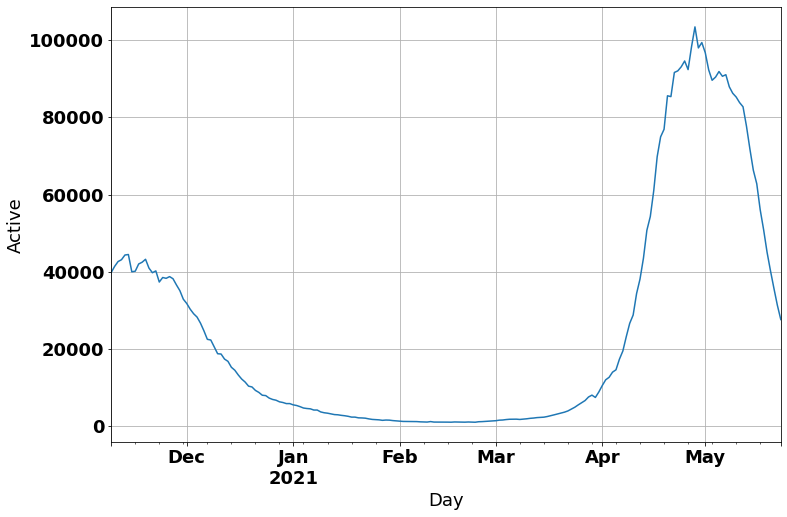

In [36]:
plt.figure(figsize=(12,8))
DF_India_u=DF_India.copy()
DF_India_u.index=DF_India_u.Day
DF_India_u['Active'].plot()
plt.ylabel('Active')
plt.grid()

### Transform the following columns using MinMax Scaling 

```'Confirmed','Deaths', 'Recovered', 'Active', 'Incident_Rate','Case_Fatality_Ratio'```

In [37]:
Selec_Columns=['Confirmed','Deaths', 'Recovered', 'Active', 'Incident_Rate','Case_Fatality_Ratio']
DF_India_u_2=DF_India_u[Selec_Columns]

DF_India_u_2

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()


DF_India_u_3 = pd.DataFrame(min_max_scaler.fit_transform(DF_India_u_2[Selec_Columns]),columns=Selec_Columns)
DF_India_u_3.index=DF_India_u_2.index
DF_India_u_3['Day']=DF_India_u.Day
DF_India_u_3.head(3)

Confirmed    Deaths  Recovered    Active  Incident_Rate  \
Day                                                                   
2020-11-09   0.000000  0.000000   0.000000  0.378714       0.000000   
2020-11-10   0.008045  0.005142   0.006352  0.394239       0.008045   
2020-11-11   0.016873  0.010408   0.013845  0.406386       0.016873   

            Case_Fatality_Ratio        Day  
Day                                         
2020-11-09             0.640908 2020-11-09  
2020-11-10             0.613050 2020-11-10  
2020-11-11             0.579571 2020-11-11

#### Load the scoring record 

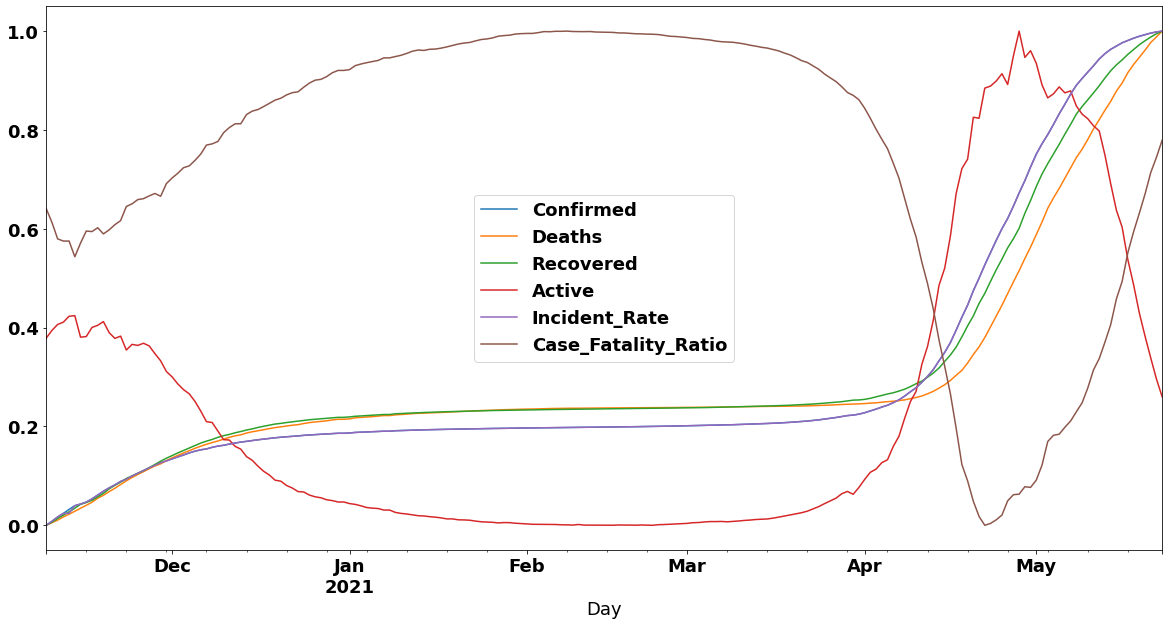

In [38]:
DF_India_u_3[Selec_Columns].plot(figsize=(20,10))
plt.savefig('output/India_scoring_report.png')

#### Save the scoring records as CSV filesDF_India_u_2DF_India_u_2DF_India_u_2 


In [39]:
DF_India_u_3.to_csv('output/India_scoring_report.csv')
DF_India_u_2.to_csv('output/India_scoring_report_NotScaled.csv')

#### Save the scoring records as tables


In [40]:
from sqlalchemy import create_engine
import psycopg2

host="postgres" # use "localhost" if you access from outside the localnet docker-compose env 
database="testDB"
user="me"
password="1234"
port='5432'
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
print(engine.table_names())

['table2', 'users2020', 'india_scoring_notscaled_report', 'india_scoring_report']


<ipython-input-40-008683b43ae6>:10: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [51]:
Day='25_5_2021'
DF_India_u_3.to_sql(f'india_scoring_report_{Day}', engine,if_exists='replace',index=False)
DF_India_u_2.to_sql(f'india_scoring_notscaled_report_{Day}', engine,if_exists='replace',index=False)

In [52]:
print(engine.table_names())

['table2', 'users2020', 'india_scoring_report', 'india_scoring_notscaled_report', 'india_scoring_report_24-5-2021', 'india_scoring_notscaled_report_24-5-2021', 'india_scoring_report_{}', 'india_scoring_notscaled_report_{}', 'india_scoring_report_{Day}', 'india_scoring_notscaled_report_{Day}', 'india_scoring_report_25_5_2021', 'india_scoring_notscaled_report_25_5_2021']


<ipython-input-52-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [53]:
scores_extracted=pd.read_sql(f"SELECT * FROM india_scoring_report_{Day}" , engine);
scores_not_scaled_extracted=pd.read_sql(f"SELECT * FROM india_scoring_notscaled_report_{Day}" , engine);

In [54]:
scores_extracted.head(3)

Confirmed    Deaths  Recovered    Active  Incident_Rate  \
0   0.000000  0.000000   0.000000  0.378714       0.000000   
1   0.008045  0.005142   0.006352  0.394239       0.008045   
2   0.016873  0.010408   0.013845  0.406386       0.016873   

   Case_Fatality_Ratio        Day  
0             0.640908 2020-11-09  
1             0.613050 2020-11-10  
2             0.579571 2020-11-11

In [55]:
scores_not_scaled_extracted.head(3)

Confirmed  Deaths  Recovered   Active  Incident_Rate  Case_Fatality_Ratio
0     443552    7060   396697.0  39795.0    2370.551275             1.591696
1     451382    7143   402854.0  41385.0    2412.398491             1.582473
2     459975    7228   410118.0  42629.0    2458.323540             1.571390